<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,81.527372,83.038916,74.842726,51.394653,0.280228,301.083895,300.767690,0.316205
1,0.0,1.0,60.546357,29.809747,94.285940,48.404824,0.085252,243.132119,243.247635,-0.115516
2,0.0,2.0,69.945375,45.886020,63.527253,98.860146,-0.004734,288.214060,288.490945,-0.276885
3,0.0,3.0,68.779923,77.853145,94.665016,23.714689,-0.401283,274.611491,274.905285,-0.293795
4,0.0,4.0,72.531191,93.816103,47.446382,71.667984,-0.268626,295.193035,295.380613,-0.187577
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,58.166354,48.931834,72.305790,68.514818,-0.569834,257.348961,257.938245,-0.589284
59996,999.0,56.0,88.787742,42.214234,29.446995,81.686852,0.298061,252.433885,252.234266,0.199619
59997,999.0,57.0,97.711146,99.974875,41.370890,39.367601,-0.085235,288.339276,288.519036,-0.179760
59998,999.0,58.0,64.240237,37.155230,30.222671,48.962479,0.438175,191.018793,190.731554,0.287238


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,81.527372,83.038916,74.842726,51.394653,0.280228,301.083895,300.767690,0.316205
1,0.0,1.0,60.546357,29.809747,94.285940,48.404824,0.085252,243.132119,243.247635,-0.115516
2,0.0,2.0,69.945375,45.886020,63.527253,98.860146,-0.004734,288.214060,288.490945,-0.276885
3,0.0,3.0,68.779923,77.853145,94.665016,23.714689,-0.401283,274.611491,274.905285,-0.293795
4,0.0,4.0,72.531191,93.816103,47.446382,71.667984,-0.268626,295.193035,295.380613,-0.187577
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,58.166354,48.931834,72.305790,68.514818,-0.569834,257.348961,257.938245,-0.589284
59996,999.0,56.0,88.787742,42.214234,29.446995,81.686852,0.298061,252.433885,252.234266,0.199619
59997,999.0,57.0,97.711146,99.974875,41.370890,39.367601,-0.085235,288.339276,288.519036,-0.179760
59998,999.0,58.0,64.240237,37.155230,30.222671,48.962479,0.438175,191.018793,190.731554,0.287238


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    81.527372  83.038916  74.842726  51.394653  0.280228  301.083895   
      1.0    60.546357  29.809747  94.285940  48.404824  0.085252  243.132119   
      2.0    69.945375  45.886020  63.527253  98.860146 -0.004734  288.214060   
      3.0    68.779923  77.853145  94.665016  23.714689 -0.401283  274.611491   
      4.0    72.531191  93.816103  47.446382  71.667984 -0.268626  295.193035   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   58.166354  48.931834  72.305790  68.514818 -0.569834  257.348961   
      56.0   88.787742  42.214234  29.446995  81.686852  0.298061  252.433885   
      57.0   97.711146  99.974875  41.370890  39.367601 -0.085235  288.339276   
      58.0   64.240237  37.155230  30.222671  48.962479  0.438175  191.018793   
      59.0   90.890464  80.350515  26.385751  96.890675 -0.304194  304.213210   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    300.767690  0.316205  
      1.0    243.247635 -0.115516  
      2.0    288.490945 -0.276885  
      3.0    274.905285 -0.293795  
      4.0    295.380613 -0.187577  
...                 ...       ...  
999.0 55.0   257.938245 -0.589284  
      56.0   252.234266  0.199619  
      57.0   288.519036 -0.179760  
      58.0   190.731554  0.287238  
      59.0   304.496650 -0.283440  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    81.527372  83.038916  74.842726  51.394653  0.280228  301.083895   
      1.0    60.546357  29.809747  94.285940  48.404824  0.085252  243.132119   
      2.0    69.945375  45.886020  63.527253  98.860146 -0.004734  288.214060   
      3.0    68.779923  77.853145  94.665016  23.714689 -0.401283  274.611491   
      4.0    72.531191  93.816103  47.446382  71.667984 -0.268626  295.193035   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   58.166354  48.931834  72.305790  68.514818 -0.569834  257.348961   
      56.0   88.787742  42.214234  29.446995  81.686852  0.298061  252.433885   
      57.0   97.711146  99.974875  41.370890  39.367601 -0.085235  288.339276   
      58.0   64.240237  37.155230  30.222671  48.962479  0.438175  191.018793   
      59.0   90.890464  80.350515  26.385751  96.890675 -0.304194  304.213210   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    300.767690  0.316205  
      1.0    243.247635 -0.115516  
      2.0    288.490945 -0.276885  
      3.0    274.905285 -0.293795  
      4.0    295.380613 -0.187577  
...                 ...       ...  
999.0 55.0   257.938245 -0.589284  
      56.0   252.234266  0.199619  
      57.0   288.519036 -0.179760  
      58.0   190.731554  0.287238  
      59.0   304.496650 -0.283440  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,81.527372,83.038916,74.842726,51.394653,0.280228,301.083895,300.767690,0.316205
1,0.0,1.0,60.546357,29.809747,94.285940,48.404824,0.085252,243.132119,243.247635,-0.115516
2,0.0,2.0,69.945375,45.886020,63.527253,98.860146,-0.004734,288.214060,288.490945,-0.276885
3,0.0,3.0,68.779923,77.853145,94.665016,23.714689,-0.401283,274.611491,274.905285,-0.293795
4,0.0,4.0,72.531191,93.816103,47.446382,71.667984,-0.268626,295.193035,295.380613,-0.187577
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,58.166354,48.931834,72.305790,68.514818,-0.569834,257.348961,257.938245,-0.589284
59996,999.0,56.0,88.787742,42.214234,29.446995,81.686852,0.298061,252.433885,252.234266,0.199619
59997,999.0,57.0,97.711146,99.974875,41.370890,39.367601,-0.085235,288.339276,288.519036,-0.179760
59998,999.0,58.0,64.240237,37.155230,30.222671,48.962479,0.438175,191.018793,190.731554,0.287238


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    81.527372  83.038916  74.842726  51.394653  0.280228  301.083895   
      1.0    60.546357  29.809747  94.285940  48.404824  0.085252  243.132119   
      2.0    69.945375  45.886020  63.527253  98.860146 -0.004734  288.214060   
      3.0    68.779923  77.853145  94.665016  23.714689 -0.401283  274.611491   
      4.0    72.531191  93.816103  47.446382  71.667984 -0.268626  295.193035   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   58.166354  48.931834  72.305790  68.514818 -0.569834  257.348961   
      56.0   88.787742  42.214234  29.446995  81.686852  0.298061  252.433885   
      57.0   97.711146  99.974875  41.370890  39.367601 -0.085235  288.339276   
      58.0   64.240237  37.155230  30.222671  48.962479  0.438175  191.018793   
      59.0   90.890464  80.350515  26.385751  96.890675 -0.304194  304.213210   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    300.767690  0.316205  
      1.0    243.247635 -0.115516  
      2.0    288.490945 -0.276885  
      3.0    274.905285 -0.293795  
      4.0    295.380613 -0.187577  
...                 ...       ...  
999.0 55.0   257.938245 -0.589284  
      56.0   252.234266  0.199619  
      57.0   288.519036 -0.179760  
      58.0   190.731554  0.287238  
      59.0   304.496650 -0.283440  

[60000 rows x 8 columns]

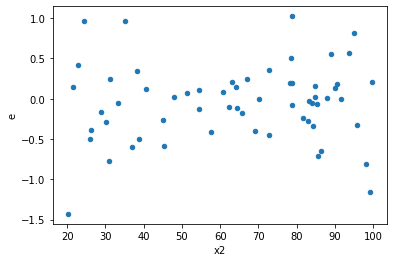

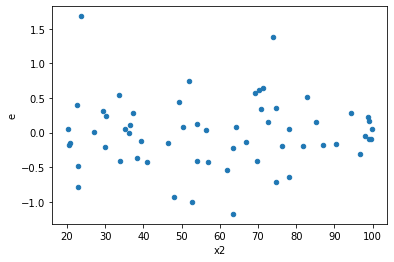

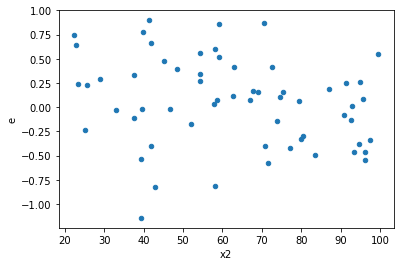

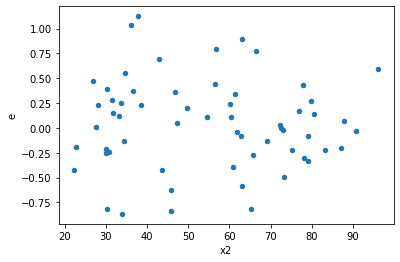

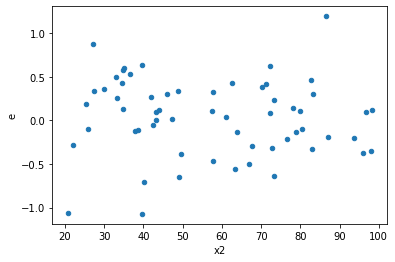

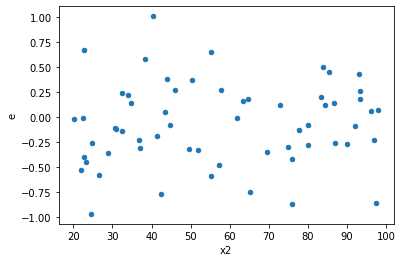

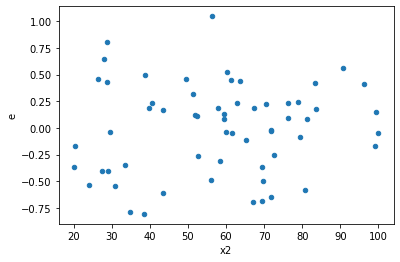

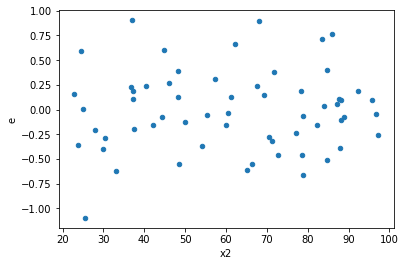

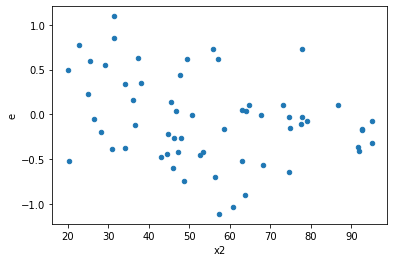

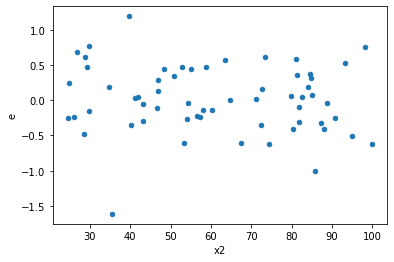

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,20.0,20.0,2.80661258700555,4.2385977137838475,0.14033062935027749,0.21192988568919238,1.5102183085076666,0.36428521659247615,0.8178573917037619,0.18214260829623807,Reject005=1 : Homoscedasticity
5.0,20.0,20.0,2.2543592287566643,3.9448257053867364,0.11271796143783322,0.19724128526933682,1.7498656181616656,0.21951755052173527,0.8902412247391324,0.10975877526086764,Reject005=1 : Homoscedasticity
7.0,20.0,20.0,3.158738311171377,4.372804251729166,0.15793691555856887,0.2186402125864583,1.3843515419634644,0.4735857245761239,0.763207137711938,0.23679286228806196,Reject005=1 : Homoscedasticity
8.0,20.0,20.0,2.605702398296511,5.371476120363333,0.13028511991482555,0.26857380601816666,2.061431161085379,0.11392798922518454,0.9430360053874077,0.05696399461259227,Reject005=1 : Homoscedasticity
13.0,20.0,20.0,3.586503795630076,4.310605212943325,0.1793251897815038,0.21553026064716624,1.2018961803959387,0.6848705095502541,0.657564745224873,0.34243525477512704,Reject005=1 : Homoscedasticity
17.0,20.0,20.0,2.1811659479586254,3.6902285817971547,0.10905829739793127,0.18451142908985774,1.6918605323225755,0.2482188065744657,0.8758905967127671,0.12410940328723286,Reject005=1 : Homoscedasticity
22.0,20.0,20.0,2.8092218758488454,4.0970833678187075,0.14046109379244226,0.20485416839093537,1.458440646159612,0.40601829936492373,0.7969908503175381,0.20300914968246186,Reject005=1 : Homoscedasticity
32.0,20.0,20.0,2.783365864672173,4.365187489539726,0.13916829323360863,0.2182593744769863,1.568312504275776,0.32234798133612474,0.8388260093319376,0.16117399066806237,Reject005=1 : Homoscedasticity
34.0,20.0,20.0,3.0043162860602504,4.228698632797024,0.1502158143030125,0.21143493163985122,1.4075410942642075,0.4513939619246379,0.7743030190376811,0.22569698096231894,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,3.569364580523009,2.1103378599280886,0.17846822902615045,0.10551689299640443,0.591236286549038,0.24847625952575,Reject005=1 : Homoscedasticity
1.0,20.0,20.0,2.80661258700555,4.2385977137838475,0.14033062935027749,0.21192988568919238,1.5102183085076666,0.36428521659247615,Reject005=1 : Homoscedasticity
2.0,20.0,20.0,3.5936501297009813,3.3661183762373317,0.17968250648504908,0.16830591881186657,0.936685056905475,0.8851622493854419,Reject005=1 : Homoscedasticity
3.0,20.0,20.0,4.223146062124816,2.455451920180423,0.2111573031062408,0.12277259600902116,0.581427183445556,0.23390089059414632,Reject005=1 : Homoscedasticity
4.0,20.0,20.0,6.301751557753502,3.563862792006499,0.3150875778876751,0.17819313960032496,0.5655352737004714,0.21114107671057267,Reject005=1 : Homoscedasticity
5.0,20.0,20.0,2.2543592287566643,3.9448257053867364,0.11271796143783322,0.19724128526933682,1.7498656181616656,0.21951755052173527,Reject005=1 : Homoscedasticity
6.0,20.0,20.0,4.594284990399822,3.646433591999452,0.2297142495199911,0.1823216795999726,0.7936890287866356,0.6102619332867841,Reject005=1 : Homoscedasticity
7.0,20.0,20.0,3.158738311171377,4.372804251729166,0.15793691555856887,0.2186402125864583,1.3843515419634644,0.4735857245761239,Reject005=1 : Homoscedasticity
8.0,20.0,20.0,2.605702398296511,5.371476120363333,0.13028511991482555,0.26857380601816666,2.061431161085379,0.11392798922518454,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      922
Reject005=0 : Heteroscedasticity     78
Name: Result_test, dtype: int64